当前数据集上的最佳模型超参数设置，
{'activation': 'tanh', 'hidden_layer_sizes': (5, 5, 2), 'learning_rate_init': 0.1, 'max_iter': 200}
相应评分:
2.009

超参数设置及相应模型（评分/±标准差）：
25.333 (+/-5.548) for {'activation': 'relu', 'hidden_layer_sizes': (5,), 'learning_rate_init': 0.001, 'max_iter': 200}
24.437 (+/-5.735) for {'activation': 'relu', 'hidden_layer_sizes': (5,), 'learning_rate_init': 0.001, 'max_iter': 300}
23.779 (+/-4.971) for {'activation': 'relu', 'hidden_layer_sizes': (5,), 'learning_rate_init': 0.001, 'max_iter': 400}
5.565 (+/-7.115) for {'activation': 'relu', 'hidden_layer_sizes': (5,), 'learning_rate_init': 0.01, 'max_iter': 200}
8.049 (+/-14.447) for {'activation': 'relu', 'hidden_layer_sizes': (5,), 'learning_rate_init': 0.01, 'max_iter': 300}
5.100 (+/-7.410) for {'activation': 'relu', 'hidden_layer_sizes': (5,), 'learning_rate_init': 0.01, 'max_iter': 400}
4.593 (+/-11.307) for {'activation': 'relu', 'hidden_layer_sizes': (5,), 'learning_rate_init': 0.1, 'max_iter': 200}
4.449 (+/-7.647) for {

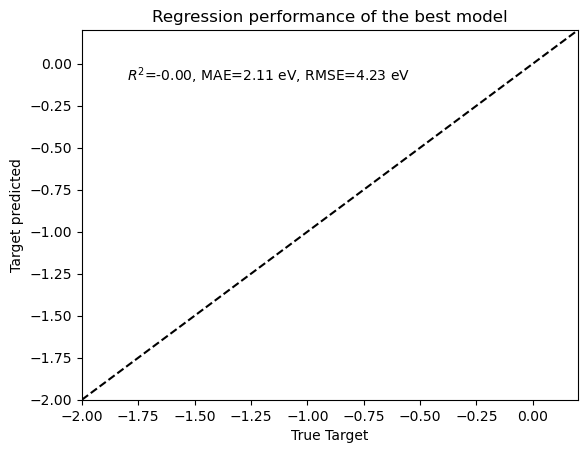

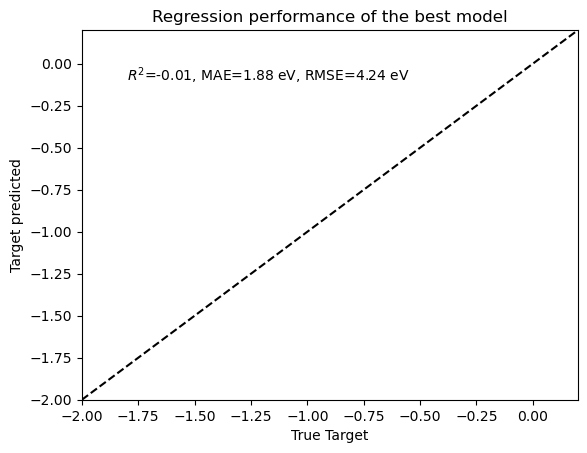

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split,GridSearchCV,learning_curve,ShuffleSplit
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
import math
import numpy as np

#读取数据表格
data = pd.read_csv('studentscores.csv',encoding='utf-8')
#print(data)
#输入特征x
X = data.iloc[:,2:]
X = X.to_numpy()
Y = data.iloc[:,1]
Y = Y.to_numpy()

#标准化
X = StandardScaler().fit_transform(X)

import warnings
warnings.filterwarnings('ignore')

#main
model = MLPRegressor() #MLP=ANN

tuned_parameters = [
    {'hidden_layer_sizes':[(5,),(5,2),(5,5,2)]
      ,"activation":['relu','logistic','tanh']
      ,'learning_rate_init':[0.001,0.01,0.1]
      ,"max_iter":[200,300,400]
    },]
clf = GridSearchCV(model,tuned_parameters,
                   scoring='neg_mean_absolute_error',cv=10)

clf.fit(X,Y)
#输出结果
print('当前数据集上的最佳模型超参数设置，')
print(clf.best_params_)
print('相应评分:')
print('%0.3f'%(-clf.best_score_))
print()
print('超参数设置及相应模型（评分/±标准差）：')
means = -clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean,std,params in zip(means,stds,clf.cv_results_['params']):
    print('%0.3f (+/-%0.03f) for %r' % (mean,std * 2,params))

#绘图
# 获取最优模型
best_model = clf.best_estimator_
#parameters = {'':,}
#model = MLPRegressor(**params,
#                    random_state=1412)
#预测
Y_pred = best_model.predict(X)
#绘制
fig,ax =  plt.subplots()
#绘制预测-真值对散点
ax.scatter(Y,Y_pred) 
#绘制对角线
ax.plot([-2,0,2],[-2,0,2],'--k')
ax.set_ylabel('Target predicted')
ax.set_xlabel('True Target')
ax.set_title('Regression performance of the best model')

#计算决定系数R2，MAE以及RMSE作为图注
ax.text(
    -1.8,
    -0.1,
    r'$R^2$=%.2f, MAE=%.2f eV, RMSE=%.2f eV'
    %(r2_score(Y,Y_pred),mean_absolute_error(Y,Y_pred),math.sqrt(mean_squared_error(Y,Y_pred))),
)
#x y 轴上下限
ax.set_xlim([-2,0.2])
ax.set_ylim([-2,0.2])

#基于最优参数再单独训练一个新模型，进行一次留一验证，测试集比例0.1
from sklearn.model_selection import train_test_split
#分配训练集，验证集
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1)
#基于最优参数训练新模型
model = MLPRegressor(**clf.best_params_)
model.fit(X_train,Y_train)

#分别预测
Y_pred = model.predict(X)
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)
#绘制
fig, ax = plt.subplots()
#绘制预测——真值对散点
#训练集数据点
ax.scatter(Y_train,Y_train_pred)
#测试集数据点（red）
ax.scatter(Y_test,Y_test_pred, color = 'r')
#绘制对角线
ax.plot([-2,0.2],[-2,0.2],'--k')
ax.set_ylabel('Target predicted')
ax.set_xlabel('True Target')
ax.set_title('Regression performance of the best model')

#计算决定系数R2，MAE以及RMSE作为图注
ax.text(
    -1.8,
    -0.1,
    r'$R^2$=%.2f, MAE=%.2f eV, RMSE=%.2f eV'
    %(r2_score(Y,Y_pred),mean_absolute_error(Y,Y_pred),math.sqrt(mean_squared_error(Y,Y_pred))),
)
#x y 轴上下限
ax.set_xlim([-2,0.2])
ax.set_ylim([-2,0.2])

plt.show()